# Exploratory Data analysis : Shopping trands data set

## Libraries

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from wordcloud import WordCloud

In [75]:
#set/ reset style at default
#plt.rcdefaults()

## Overview of the data

In [76]:
df = pd.read_csv("shopping_trends_updated.csv")
print(df.shape)
print(df.columns)
print(df.info())

(3900, 18)
Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   C

In [77]:
# Statistic description of quantitative variables
print(df.loc[:,["Age", "Review Rating", "Previous Purchases", "Purchase Amount (USD)"]].describe())

               Age  Review Rating  Previous Purchases  Purchase Amount (USD)
count  3900.000000    3900.000000         3900.000000            3900.000000
mean     44.068462       3.749949           25.351538              59.764359
std      15.207589       0.716223           14.447125              23.685392
min      18.000000       2.500000            1.000000              20.000000
25%      31.000000       3.100000           13.000000              39.000000
50%      44.000000       3.700000           25.000000              60.000000
75%      57.000000       4.400000           38.000000              81.000000
max      70.000000       5.000000           50.000000             100.000000


In [78]:
# Checking if there are any null values
df.isna().any()

# Checking if there are any duplicated values
df.duplicated().any()

False

## Decription of a few variables
'Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
'Review Rating', 'Subscription Status', 'Shipping Type',
'Discount Applied', 'Promo Code Used', 'Previous Purchases',
'Payment Method', 'Frequency of Purchases'

In [109]:
class CategorialVariableGraph:
    def __init__(self, variable, df_variable):
        self.variable = variable
        self.df_variable = df_variable
        self.values = self.df_variable.value_counts()
        self.labels = list(pd.unique(self.df_variable))
        self.colors = plt.get_cmap("tab20")(np.arange(len(self.labels)))

    def make_pie(self):
        # data
        x = np.array(self.values)
        # plot
        plt.pie(x = x, labels= self.labels, colors=self.colors, wedgeprops={"linewidth": 1, "edgecolor": "white"},
                autopct='%1.1f%%')
        plt.title(f"Pie of {self.variable}", fontsize = 15)
        return(plt.show())
    
    def make_barplot(self):
        # data
        x = np.array(self.values)
        # plot
        fig, ax = plt.subplots(ncols = 1, nrows = 1)
        ax.bar(x = self.labels, height = x, color = self.colors)
        ax.tick_params(axis="x", rotation = 45)
        fig.suptitle(f"Barplot of {self.variable}", fontsize = 15)
        fig.supylabel(f"Number of customer")
        return(fig.show())
    
    def make_wordcloud(self):
        # plot
        d = {}
        for k in range(len(self.labels)):
            d[self.labels[k]] = self.values[k]

        wc = WordCloud().generate_from_frequencies(d)
        plt.imshow(wc)
        plt.axis("off")
        return(plt.show())     

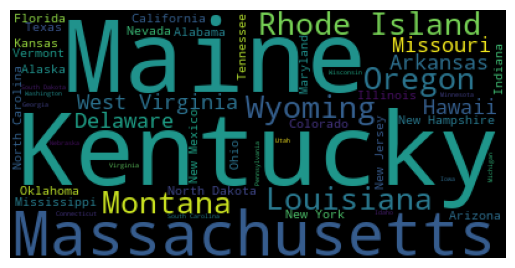

In [80]:
cat_df = CategorialVariableGraph(variable="Location", df_variable=df["Location"])
cat_df.make_wordcloud()

C:\Users\nonop\AppData\Local\Temp\ipykernel_5316\2262947824.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return(fig.show())


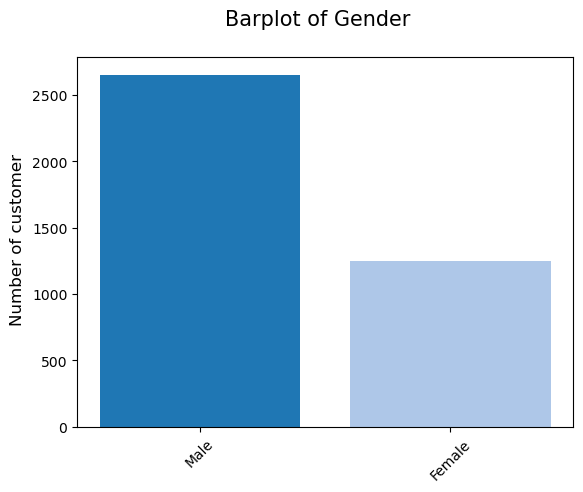

In [111]:
gender_df = CategorialVariableGraph(variable="Gender", df_variable=df["Gender"])
gender_df.make_barplot()

In [94]:
class QuantitativeVariableGraph:
    def __init__(self, variable, df_variable):
        self.variable = variable
        self.df_variable = df_variable
    def make_hist(self):
        fig, ax = plt.subplots(ncols=1, nrows=1)
        ax.hist(self.df_variable, edgecolor="white")
        fig.suptitle(f"Histogram of {self.variable}")
        fig.supxlabel(f"{self.variable}")
        fig.supylabel(f"Number of customers")
        return(fig.show())


C:\Users\nonop\AppData\Local\Temp\ipykernel_5316\1442061585.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return(fig.show())


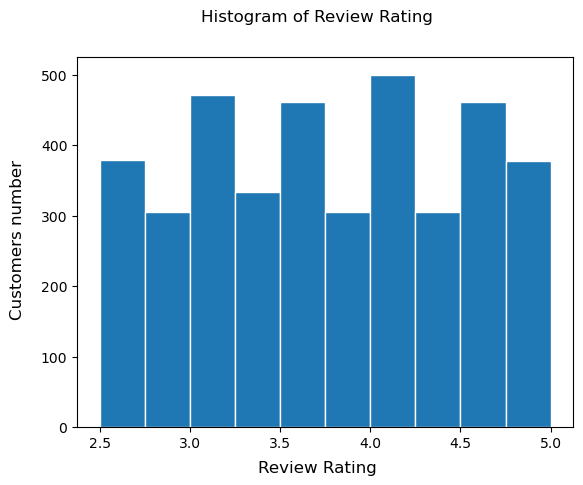

In [95]:
quant = QuantitativeVariableGraph(variable="Review Rating", df_variable=df["Review Rating"])
quant.make_hist()

## Questions:
### 1. What is the average age of customers ?

In [83]:
mean = df["Age"].mean()

print(f"The average custommer's age is {int(np.round(mean))} years old.")

The average custommer's age is 44 years old.


### 2. What is/are the most common item/s purchased ?

In [84]:
items_count = pd.DataFrame(df["Item Purchased"].value_counts())
items_count[items_count["Item Purchased"]==items_count["Item Purchased"].max()]

,Item Purchased
Blouse,171
Jewelry,171
Pants,171


### 3. What is the total purchase amount for each category ?

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


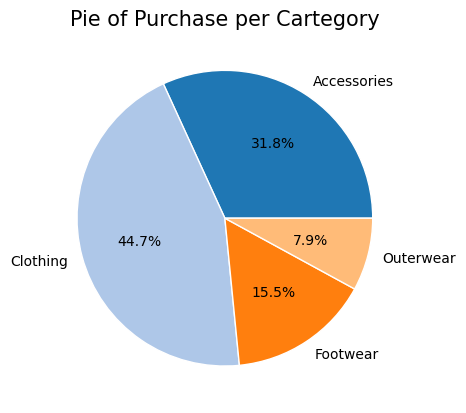

In [85]:
purchase_percat = df.groupby("Category")["Purchase Amount (USD)"].sum()
print(purchase_percat)
cat = CategorialVariableGraph(variable="Purchase per Cartegory", df_variable=purchase_percat)
cat.labels = purchase_percat.index
cat.values = purchase_percat.values
cat.make_pie()

C:\Users\nonop\AppData\Local\Temp\ipykernel_5316\2237963205.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


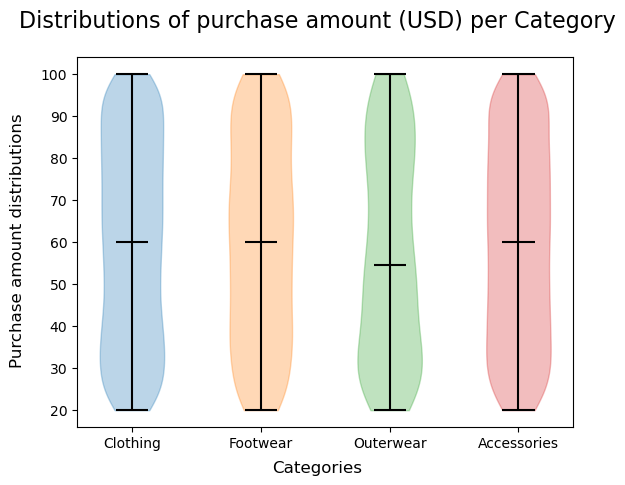

In [86]:
categories = list(pd.unique(df["Category"]))
input = list()

for i in range(len(categories)):
    input.append(df.groupby("Category")["Purchase Amount (USD)"].get_group(categories[i]))

fig, ax = plt.subplots(ncols=1, nrows=1)
plot = ax.violinplot(input, showmedians=True)

colors = list(plt.get_cmap("tab10")(np.arange(4)))

for i in range(len(plot['bodies'])):
    plot['bodies'][i].set_facecolor(colors[i])
    plot['bodies'][i].set_edgecolor(colors[i])

plot['cbars'].set_color("black")
plot['cmaxes'].set_color("black")
plot['cmins'].set_color("black")
plot['cmedians'].set_color("black")

ax.set_xticks(range(1,len(categories)+1), labels=categories)

fig.suptitle("Distributions of purchase amount (USD) per Category", fontsize = 16)
fig.supxlabel("Categories")
fig.supylabel("Purchase amount distributions")
fig.show()



### Purchase Amount by Season

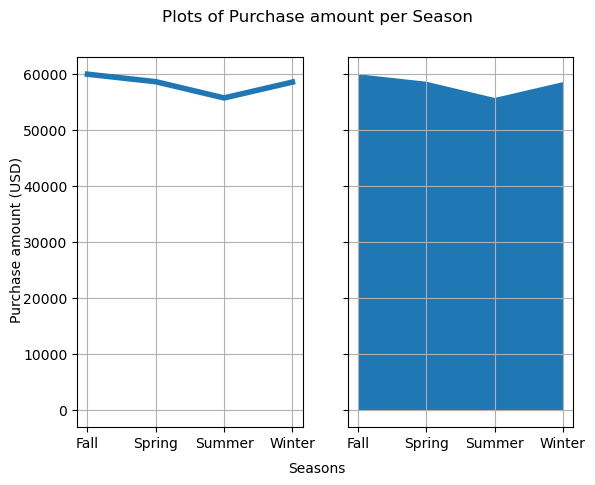

In [87]:
# data
purchase_perseason = df.groupby("Season")["Purchase Amount (USD)"].sum()
cat = CategorialVariableGraph(variable="Purchase amount per Season", df_variable=purchase_perseason)
cat.values = purchase_perseason.values
cat.labels = purchase_perseason.index

# plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

ax1.plot(cat.labels, cat.values, lw=4)
ax2.fill_between(cat.labels, cat.values)

for ax in ax1, ax2:
    ax.grid(True)

fig.suptitle(f"Plots of {cat.variable}")
fig.supxlabel("Seasons", fontsize = 10)
fig.supylabel("Purchase amount (USD)", fontsize = 10)
plt.show()